<h1 style="text-align:center; color:#2E86C1;"><strong>NYC Taxi Trip EDA</strong></h1>


**Name:** Grandhi Akshay  
**University:** Amrita Vishwa Vidyapeetham  
**Email:** [akshaygrandhi123@gmail.com](mailto:akshaygrandhi123@gmail.com)  
**Mobile:** +91 93926 55163  
**Github Repo:** [https://github.com/akshaygrandhi123/Fractal_EDA_Preboarding](https://github.com/akshaygrandhi123/Fractal_EDA_Preboarding)  
**Portfolio:** [akshaygrandhiportfolio.netlify.app](https://akshaygrandhiportfolio.netlify.app/)


<h1 style="text-align:Left;"><strong>Data Understanding</strong></h1>

###  Summary:

- Loaded the dataset and displayed its structure using `.info()`, `.head()` and `.decribe()`
- Explored shape, column names and data types
- Checked for null values in the dataset (There are no null values in this dataset upon checking)
- Examined unique value counts and distributions for categorical features
- Identified trips with zero passengers and trips with duration less than 30secs (trip < 30sec is either an outlier or wrong entry because trips on taxi can't be less than half a minute)
- Histogram of trip durations
- Identified outliers using speed in Km/min calculation

### Features and their description

1. **id:** Unique identifier for each trip (Primary Key)
2. **vendor_id:** identifier for the vendor (1/ or 2)
3. **pickup_datetime:** Start time of the trip  
4. **dropoff_datetime:** End time of the trip  
5. **passenger_count:** Number of passengers (for that certain trip) 
6. **pickup_longitude:** Starting longitude  
7. **pickup_latitude:** Starting latitude  
8. **dropoff_longitude:** Ending longitude  
9. **dropoff_latitude:** Ending latitude  
1. **store_and_fwd_flag:** Whether trip was stored then forwarded (Y or N)  
2. **trip_duration:** Trip duration in seconds (target variable)

In [67]:
!pip install geopy
!pip install plotly
!pip install haversine
!pip install ydata-profiling


In [68]:
import pandas as pd
import numpy as np
import time
import calendar
import matplotlib.pyplot as plt # Visualization
%matplotlib inline
import seaborn as sns
import plotly.express as px # Geolocation and Mapping
from geopy.geocoders import Nominatim 
from haversine import haversine, Unit
from ydata_profiling import ProfileReport # Pandas Profiling Report


In [69]:
df = pd.read_csv("nyc_taxi_trip_duration.csv") # Load the dataset

In [70]:
df.head() # Return first 5 rows of the dataset

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1864733,1,05-01-2016 00:19,27-01-2016 11:08,1,-73.789650,40.643558,-73.956810,40.773087,N,1939736
1,id0593332,2,31-05-2016 13:00,01-06-2016 13:00,1,-73.781952,40.644688,-73.993874,40.745926,N,86391
2,id2837671,2,30-06-2016 16:37,01-07-2016 16:37,1,-73.992279,40.749729,-73.962524,40.800770,N,86387
3,id3782820,2,12-05-2016 13:48,13-05-2016 13:47,1,-73.781990,40.644722,-73.980675,40.724918,N,86378
4,id2307896,2,14-05-2016 04:48,15-05-2016 04:47,1,-74.000504,40.732121,-73.994202,40.712418,N,86377


In [71]:
df.tail() # Return last 5 rows of the dataset

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id2697717,2,27-03-2016 12:55,27-03-2016 12:55,2,-73.983154,40.767159,-73.983238,40.767097,N,1
729318,id0948644,2,22-02-2016 00:40,22-02-2016 00:40,0,-73.987595,40.719997,-73.987595,40.720005,N,1
729319,id0839864,1,06-02-2016 13:40,06-02-2016 13:40,1,-73.987991,40.724083,-73.987991,40.724079,N,1
729320,id0550194,1,20-04-2016 23:15,20-04-2016 23:15,1,-73.986282,40.750034,-73.986237,40.750088,N,1
729321,id2072503,1,20-01-2016 05:53,20-01-2016 05:53,1,-73.807213,40.658192,-73.807259,40.658051,N,1


In [72]:
df.shape # Return shape of the dataset

(729322, 11)

In [73]:
df.columns # Return columns of the dataset

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [74]:
df.dtypes # Return data types of the columns

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [75]:
df.info() # Return information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [76]:
df.describe() # Return summary statistics of the dataset

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712235,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


### **Observations**

1. **Dataset Overview** -  Contains **729,322** valid entries across all columns.
2. **Vendor ID** -  Only two unique vendors (1 and 2) with a nearly balanced share (mean ≈ 1.53).
3. **Passenger Count**  
   * Average passengers per trip: **1.66** ~ 2 passengers
   * Some records show **0 passengers**, which is invalid.
   * Maximum count of **9 passengers**, which is acceptable for large vehicles.
4. **Geographical Coordinates** -  Pickup and dropoff locations are centered around NYC (mean ≈ -73.973, 40.75) which tells most trips are **short-distance and within the city**.  
5. **Trip Duration**
   * Average duration: **952 seconds** (\~15.8 minutes).
   * Extremely high maximum duration (22 days) and high standard deviation tells presecence of **potential outliers or data entry errors**.


In [77]:
df.isnull().sum()  # Check for missing values in the dataset


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [78]:
df.nunique() # Check for unique values in each column

id                    729322
vendor_id                  2
pickup_datetime       223893
dropoff_datetime      224158
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [79]:
# counts of categorical fields(store_and_fwd_flag, vendor_id) using cross tabulation
table = pd.crosstab(df['store_and_fwd_flag'], df['vendor_id'])
print("Trip Counts by Store-and-Forward Flag and Vendor ID:\n")
print(table)


Trip Counts by Store-and-Forward Flag and Vendor ID:

vendor_id                1       2
store_and_fwd_flag                
N                   334801  390481
Y                     4040       0


In [80]:
print(f"Number of trips with 0 passengers: {(df['passenger_count'] == 0).sum()}")

Number of trips with 0 passengers: 33


In [81]:
print("Number of trips with less than 30 seconds: ",(df['trip_duration']<=30).sum())

Number of trips with less than 30 seconds:  2418


Mode of trip durations (in minutes) under 60 min: 5.8
Total trips under 60 minutes: 723255


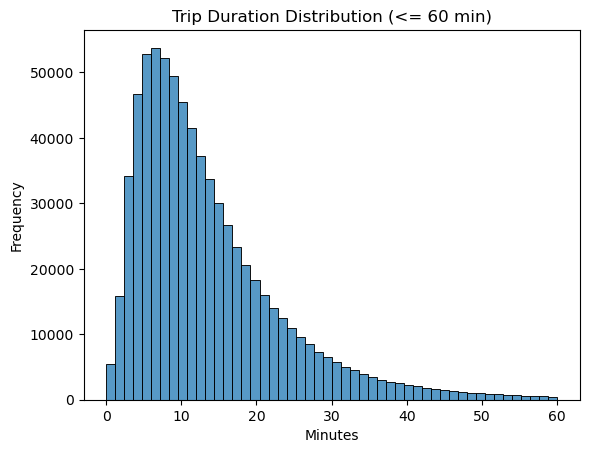

In [82]:
# Histogram of trip durations under 60 min
mode_minutes = (df[df['trip_duration'] < 3600]['trip_duration'] / 60).mode()[0]
print("Mode of trip durations (in minutes) under 60 min:", mode_minutes)
print("Total trips under 60 minutes:", (df['trip_duration'] < 3600).sum())

sns.histplot((df[df['trip_duration'] <= 3600]['trip_duration']) / 60, bins=50)
plt.title("Trip Duration Distribution (<= 60 min)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")  # Set x-axis ticks from 0 to 60 minutes
plt.show()


**Inference ( Data Understanding )**:
1. Given datset is of 2 vendors and 9 different passanger counts
2. Avg journey duration is of 15.8 minutes
3. More than 99% of trips have duration less than 60 Minutes
4. Higher the trip duration lower the number of trips (after 6 minutes)
5. Majority of trips had duration around 5.8 minutes (mode)
3. There are no null values in our data.
4. There are trips with 0 passengers which might be cancelled trips or errors.
5. There are approx 2400 trips with less than 30 seconds which also might indicate mis-entries because a typical taxi trip in NYC can't be less than 30secs


<h1 style="text-align:Left;"><strong>Data Cleaning</strong></h1>

###  Summary:

- Dropped rows with zero passengers and trip duration less than 30 seconds
- Reset the dataframe index after cleaning
- Checked for error between trip duration calculated and given trip duration and dropped if error < 60 seconds
- Checked for rows with unrealistic speeds based on the speed calclulation in Km/min and drop them based on a threshold fixed(1.5 Km/min) because they are outliers

In [83]:
# Drop rows with passenger_count = 0 since they are not valid/ not considered as trips
df.drop(df[df['passenger_count'] == 0].index, inplace=True)
df.drop(df[df['trip_duration'] <= 30].index, inplace=True)


In [84]:
df.reset_index(drop=True, inplace=True)

In [85]:
# Shape after dropping trips with 0 'passenger_count'
print(f"Number of trips after dropping necessary rows: {df.shape}") # should be 0 (for validation)

Number of trips after dropping necessary rows: (726890, 11)


**Inference ( Data Cleaning )**:
1. Speeds >2 Km/min are dropped since they are unrealsitic in NYC (in **Data Transformation** section after calculating the speeds) and this cleaning can also be done by removing box plot's lower and upper quantile
2. Even after removing all the outliers using box plot or a treshold value there will still be some more threshold values, but they wont effect the accuracies when used for a Machine learning model because the outliers after removal are <1% of the full dataset.
3. Dropped trips with zero passengers and trips with duration less than 30seconds followed by resetting index

<h1 style="text-align:Left;"><strong>Data Transformation and Feature Engineering</strong></h1>

### Summary:

* Converted pickup and dropoff columns to datetime format and Extracted date, day name, weekday number, hour, and month and order the month in ascending order
* Calculated trip duration (in seconds) from pickup and dropoff times for finding outliers upon validation with given trip duration
* Categorized pickup and dropoff hours into time-of-day bins (e.g., morning, evening)
* Calculated Haversine distance between pickup and dropoff coordinates (Haversine vs great\_circle (geopy) – haversine is \~99.7% accurate and also fastest comparatively. So, it's better when used on large datasets)
* Calculated average speed in km/min for each trip
* Created combined pickup and dropoff coordinate strings for reverse geocoding


In [86]:
# Change object to datetime format for 'pickup_datetime' and 'dropoff_datetime'
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], dayfirst=True)
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], dayfirst=True)


In [87]:
# Extract date, day, day number, time, hour, and month from pickup and dropoff datetime
df['pickup_date'] = df['pickup_datetime'].dt.date # date
df['pickup_day']=df['pickup_datetime'].dt.day_name()  # day name
df['pickup_day_no']=df['pickup_datetime'].dt.weekday # day number (0=Monday, 6=Sunday)
df['pickup_time'] = df['pickup_datetime'].dt.time # time (HH:MM:SS)
df['pickup_hour'] = df['pickup_datetime'].dt.hour # hour (0-23)
df['pickup_month']=df['pickup_datetime'].dt.month # month (1-12)
df['dropoff_date'] = df['dropoff_datetime'].dt.date
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday
df['dropoff_time'] = df['dropoff_datetime'].dt.time
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_month']=df['dropoff_datetime'].dt.month
df['month'] = df['pickup_month'].apply(lambda x: calendar.month_name[x]) # month name (january, february)
df['pickup_day_num'] = df['pickup_datetime'].dt.day # day (1-31)

In [88]:
month = ['January', 'February', 'March', 'April', 'May', 'June']
# Convert 'month' column to categorical with the specified order
df['month'] = pd.Categorical(df['month'], categories=month, ordered=True)

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Convert 'weekday' column to categorical with ordered categories
df['pickup_day'] = pd.Categorical(df['pickup_day'], categories=weekday, ordered=True)

In [89]:
print(df['month'])


0          January
1              May
2             June
3              May
4              May
            ...   
726885         May
726886    February
726887       March
726888         May
726889       March
Name: month, Length: 726890, dtype: category
Categories (6, object): ['January' < 'February' < 'March' < 'April' < 'May' < 'June']


In [90]:
# Calculate trip duration in secs
df['trip_duration_calculated'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds()


In [91]:
# calculate the difference between calculated and given trip duration and check if they are almost equal
df['error'] = abs(df['trip_duration_calculated'] - df['trip_duration'])
print(f"The maximum no of seconds of error in between calculated and given trip duration: ",int(max(df['error'])),"secs")


The maximum no of seconds of error in between calculated and given trip duration:  59 secs


- Here the maximum of error obtained is 59 seconds which is less than 1 Min so it doesn't really make much difference. So, it's not required to drop the rows

In [92]:
# Data Cleaning (check for error in trip duration calculated and given)
if max(df['error']) < 60:
    df.drop(['trip_duration_calculated', 'error'], axis=1, inplace=True)
    print("The difference between calculated and given trip duration is less than 60 seconds. Keeping the rows.")
else:
    print("The difference between calculated and given trip duration is more than 60 seconds. Dropping the rows.")

The difference between calculated and given trip duration is less than 60 seconds. Keeping the rows.


In [93]:
# categorize time of day into different time slots
def get_time_of_day(hour):
    if 6 <= hour < 9:
        return 'Morning'
    elif 9 <= hour < 12:
        return 'Late Morning'
    elif 12 <= hour < 15:
        return 'Afternoon'
    elif 15 <= hour < 17:
        return 'Late Afternoon'
    elif 17 <= hour < 19:
        return 'Evening'
    elif 19 <= hour < 23:
        return 'Late Evening'
    else:
        return 'Night'

df['pickup_timeofday'] = df['pickup_hour'].apply(get_time_of_day)


In [94]:
# Earth radius in kilometers is taken into caluculation to assume earth radius and not to caluculate straight distance
def haversine(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2]) # decimal degrees to radians
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return 6371 * c

df['trip_distance_km'] = haversine(
    df['pickup_latitude'], df['pickup_longitude'],
    df['dropoff_latitude'], df['dropoff_longitude']
) # parameters are passed to the function

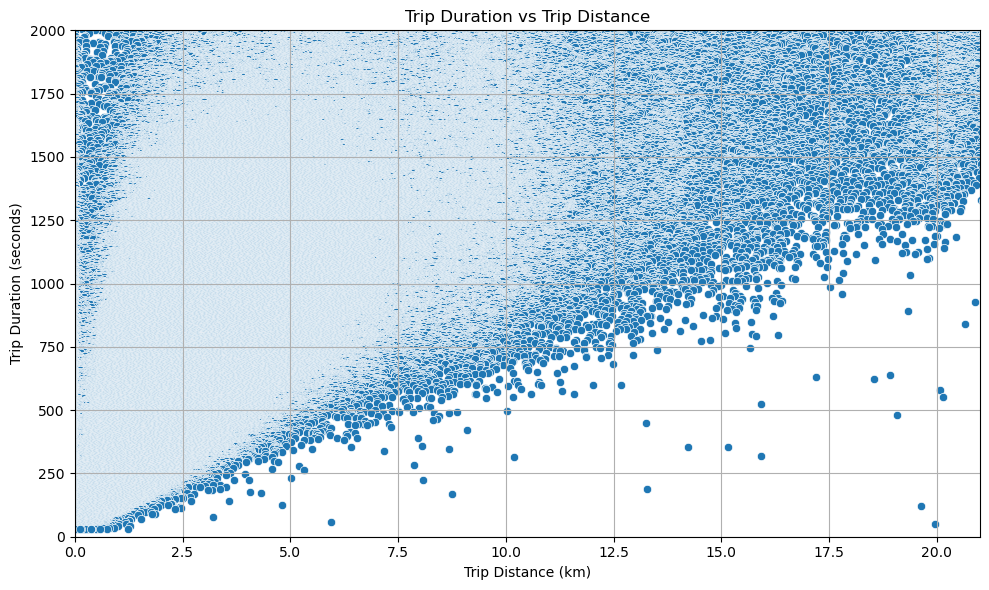

In [95]:
# Scatter plot of trip duration vs trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance_km', y='trip_duration', data=df)

plt.title('Trip Duration vs Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Duration (seconds)')
plt.xlim(0, 21)
plt.ylim(0, 2000)
plt.grid(True)
plt.tight_layout()
plt.show()

- The above scatter plot shows that for the increase in distance it takes more trip duration

In [96]:
# Convert trip duration to minutes
df['trip_duration'] = (df['trip_duration'] / 60).astype(float)


In [97]:
df['speed(km/min)'] = df['trip_distance_km'] / df['trip_duration']
df = df[(df['speed(km/min)'] <= 1.5) & (df['speed(km/min)'] >= 0.01)] # Drop rows with unrealistic speeds ( Data Cleaning )

In [98]:
df.shape # shape after dropping unrealistic speeds

(722041, 28)

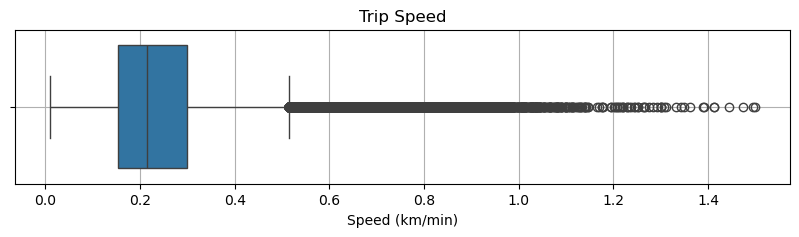

In [99]:
# Box plot of trip speed
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['speed(km/min)'])
plt.title('Trip Speed')
plt.xlabel('Speed (km/min)')
plt.grid(True)
plt.show()


- Most trips have reasonable, slow to moderate speeds typical for city traffic (NYC city speed rules permits to drive around in speed range 0.5-1.5 Km/min).
- A long right tail and many outliers tells the presence of abnormal data or possible noise.
- the scatter plot shows the corrrelation between distance in Km and duration in seconds which shows that major trips are under 20Km range and under 2000 seconds that is under 33 mins range

In [100]:
df[df.trip_distance_km == 0].shape #Around 26 rows are having trip distance = 0

(0, 28)

**Reasons for Trip distance in KM = 0**
- Short trip durations
- passenger might have changed their mind and cancelled the ride

**Inference ( Data Transformation and Feature Engineering )**:
1. Speeds >1.5 Km/min (treshold value) are dropped since they are unrealsitic in NYC (in **Data Transformation** section after calculating the speeds) and this cleaning can also be done by removing box plot's lower and upper quantile
2. For the above **box plot should not be used** beacuse since the majority of values lies in the range of 0.3-0.6 it shows all values above 1 Km/min as outlier upon calculating lower and upper bound using IQR and Q1 and Q3 value. Which is not a preferred methold in this case because they are still valid speeds

<h1 style="text-align:left;"><strong>Exploratory Visualizations with Insights</strong></h1>

### Summary:

* A **bar chart of trip counts by Vendor ID** was created to analyze how ride volumes are distributed between different vendors.
* A **segmented bar chart** showing **Vendor ID vs. Number of Trips** categorized by **time of day** (morning, afternoon, evening, night) helped assess vendor activity patterns across different time blocks.
* A **bar plot of trip counts by passenger count** was used to understand common group sizes and inform decisions on vehicle type allocation.
* A **bar plot comparing Vendor ID and average trip duration** was used to evaluate vendor performance in terms of trip efficiency.
* A **bar chart analyzing the relationship between passenger count and trip duration** helped identify trends in ride length based on group size.
* A **donut chart** was used to visualize the distribution of **trip duration categories** (short, medium, long) for a quick overview of trip types.
* A **pie chart** displayed the **passenger count distribution**, highlighting the most frequent group sizes among riders.


<Axes: xlabel='vendor_id', ylabel='count'>

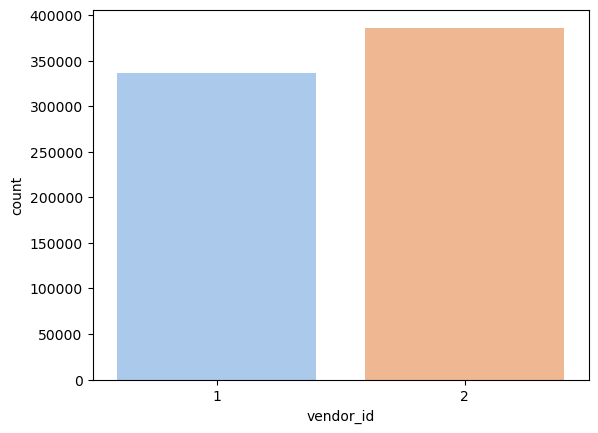

In [101]:
# plot the vendor id distribution
sns.countplot(x='vendor_id', hue='vendor_id', data=df, palette='pastel', legend=False)


  * **Vendor 2** has more trips (\~390,000) than **Vendor 1** (\~335,000).
  * Difference is notable but not drastic.  
  
**Implication**: Vendor 2 might be more popular or more widely available, suggesting a potential service quality or reach advantage.

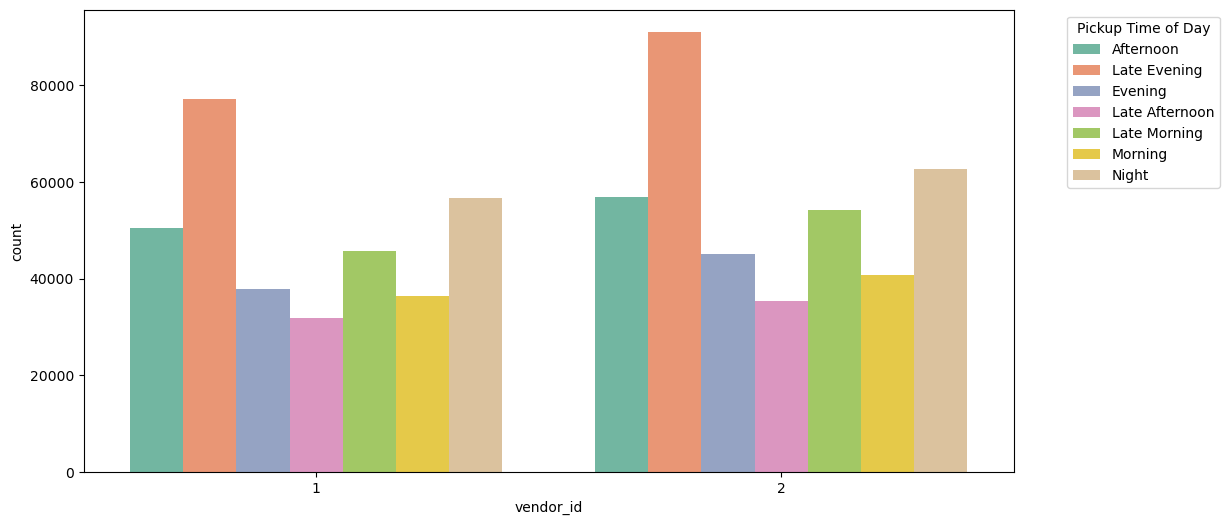

In [102]:
# Plotting no of trips by time of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='vendor_id', hue='pickup_timeofday', data=df, palette='Set2', legend=True)
plt.legend(title='Pickup Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left')

  * **Late Evening** is the peak period.
  * **Night** and **Afternoon** are the next busiest.
  * **Late Afternoon** and **Morning** are less popular.  
  * Vendor 2 has most number of trips compared to vendor 1 on all days

**Implication:** Demand is highest during Late Evenings, suggesting possible end-of-day commute or nightlife traffic.

<Axes: xlabel='passenger_count', ylabel='count'>

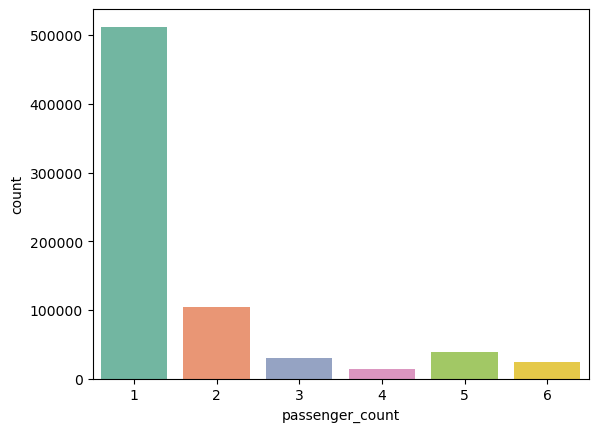

In [103]:
# Plot no of trips by passenger count
sns.countplot(x='passenger_count',hue='passenger_count',data=df, palette='Set2', legend=False)

  * The vast majority of trips (~500,000+) had only 1 passenger.  
  * Trips with 2 passengers are significantly fewer (~100,000+).  
  * Very few trips involved 3 to 6 passengers, each category showing a sharp drop-off in count.  

**Implication:** Most rides are likely solo trips, possibly for work commutes or errands.


<Axes: xlabel='vendor_id', ylabel='trip_duration'>

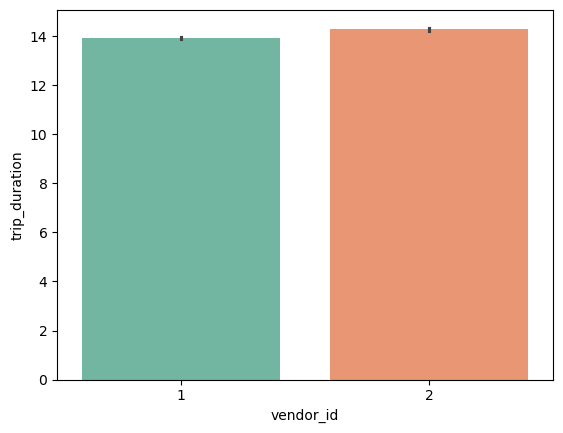

In [104]:
# Plot vendror id vs trip duration
sns.barplot(y='trip_duration', x='vendor_id', hue='vendor_id', data=df, estimator=np.mean, palette='Set2', legend=False)


* **Vendor 2** has slightly longer average trip durations than **Vendor 1**.  

**Implication**: Vendor 2 may be assigned longer routes or operate in higher-traffic areas. can be used for vendor performance evaluation.


C:\Users\MY PC\AppData\Local\Temp\ipykernel_7724\1686631150.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




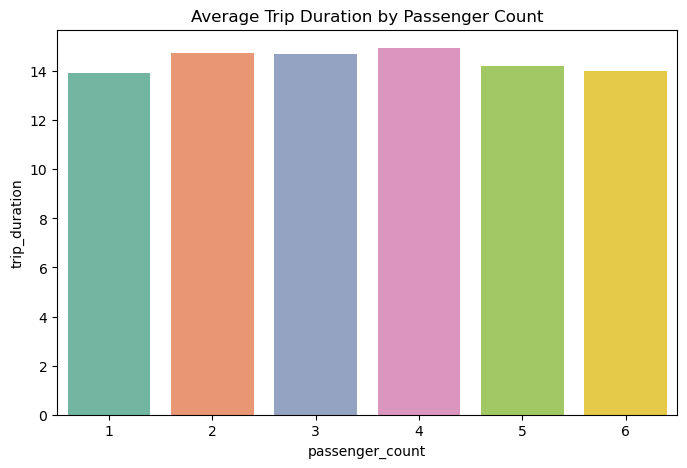

In [105]:
# plot passenger count vs trip duration
avg_duration = df.groupby('passenger_count')['trip_duration'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='passenger_count', y='trip_duration', data=avg_duration, palette='Set2')
plt.title('Average Trip Duration by Passenger Count')
plt.show()

* Trip with passenger count of 3,4 have slightly more average trip duration  

**Implication**:  may be of a shared taxi for longer distances

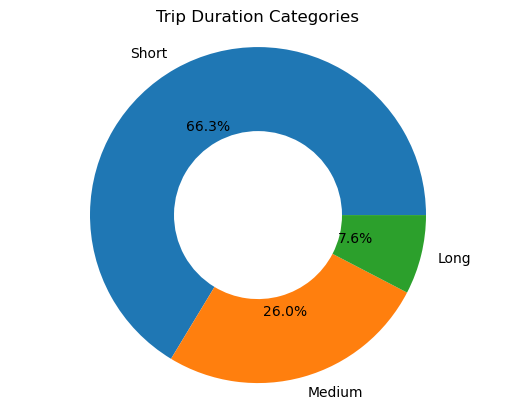

In [106]:
# plot donut chart for trip duration categories 
# bin trip durations into categories
bins = [0, 15, 30, float('inf')]  # 0–15min, 15–30min, 30+min
labels = ['Short', 'Medium', 'Long']
df['trip_duration_cat'] = pd.cut(df['trip_duration'], bins=bins, labels=labels)

duration_counts = df['trip_duration_cat'].value_counts().sort_index()

# modify wedge props for donut chart
plt.pie(duration_counts, labels=duration_counts.index, autopct='%1.1f%%', wedgeprops={'width': 0.5})
plt.title('Trip Duration Categories')
plt.axis('equal')
plt.show()


* Trip Duration as categories Short (0-15 Min), Medium (15-30 Min) and Long (30+ Min) distribution in a donut chart representation

**Implication**:  More number of rides are of short durations

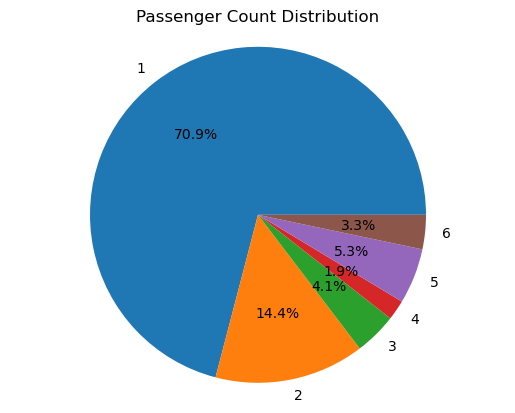

In [107]:
#plotted pie chart for passenger count distribution
passenger_counts = df['passenger_count'].value_counts().sort_index()

plt.pie(passenger_counts, labels=passenger_counts.index, autopct='%1.1f%%')
plt.title('Passenger Count Distribution')
plt.axis('equal')
plt.show()


* Passenger count distribution in a pie chart representation

**Implication**:  More number of rides are having 1 passenger followed by 2 passengers

<h1 style="text-align:left;"><strong>Statistical Insights</strong></h1>


<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250221120417227467/stat.webp" alt="GFG Statistics Image" height="400" width="600"/>

<p style="font-size:small; color:gray;">Image source: <a href="https://www.geeksforgeeks.org/statistics/" target="_blank" rel="noopener noreferrer">Geeks for Geeks</a></p>

- All the **descriptive statistics** methods mentioned in the image are shown in the below statistical insights continued by Hypothesis testing from **Inferential statistics** analysis.

In [108]:
df[['trip_duration', 'trip_distance_km', 'speed(km/min)']].describe()

,trip_duration,trip_distance_km,speed(km/min)
count,722041.000000,722041.000000,722041.000000
mean,14.107546,3.465998,0.241449
std,16.048566,3.955051,0.127555
min,0.516667,0.005443,0.010007
25%,6.666667,1.251606,0.153722
50%,11.083333,2.115037,0.214394
75%,17.916667,3.902796,0.298309
max,1439.850000,173.029357,1.498249


- The average trip duration is about 14.1 minutes, with most trips falling between 6.7 and 17.9 minutes, but some rare trips last much longer, up to 1439.85 minutes after removing the outliers.
- Trip distances are usually short, with a median = 2.1 km, but the maximum value = 173 km means some unusually long rides in the dataset.
- Speed tends to cluster around 0.24 km/min, but the wide range from 0.01 to 1.49 km/min might due to NYC traffic or route differences.


In [109]:
meanval = df[['trip_duration', 'trip_distance_km', 'speed(km/min)']].mean()
medianval = df[['trip_duration', 'trip_distance_km', 'speed(km/min)']].median()

mode_duration = df['trip_duration'].mode()[0] # mode() returns a DataFrame, so we need to access using the first row for each column
mode_distance = df['trip_distance_km'].mode()[0]
mode_speed = df['speed(km/min)'].mode()[0]

results = pd.DataFrame({ 'Mean': meanval, 'Median': medianval, 'Mode': [mode_duration, mode_distance, mode_speed]})
results

,Mean,Median,Mode
trip_duration,14.107546,11.083333,5.800000
trip_distance_km,3.465998,2.115037,0.005443
speed(km/min),0.241449,0.214394,0.010007


- The distributions of trip duration, trip distance, and speed is in order Mean > Median > Mode. 
- This says that most trips are short and slow, with a few outliers affecting averages. 
- Median values are best central tendency to identify presence of outliers.


In [110]:
variance = df.var(numeric_only=True)
std_dev = df.std(numeric_only=True)
range = df.max(numeric_only=True) - df.min(numeric_only=True)

stats = pd.DataFrame({ 'Variance': variance, 'Standard_Deviation': std_dev, 'Range': range})
stats

,Variance,Standard_Deviation,Range
vendor_id,0.248790,0.498788,1.000000
passenger_count,1.721779,1.312166,5.000000
pickup_longitude,0.001431,0.037822,2.217918
pickup_latitude,0.000778,0.027884,1.515232
dropoff_longitude,0.001276,0.035724,2.064034
dropoff_latitude,0.001036,0.032184,1.187466
trip_duration,257.556467,16.048566,1439.333333
pickup_day_no,3.819852,1.954444,6.000000
pickup_hour,40.975941,6.401245,23.000000
pickup_month,2.823758,1.680404,5.000000


- trip_duration, trip_distance_km has more variability, shows a wide range of travel times and distances
- pickup_hour, dropoff_hour, and hour have moderate variability (Std dev ≈ 6.4), means good spread of data across different times of the day.
- Coordinates have very low variability, means most rides occur in a same area, such as a city center.


In [111]:
ct = pd.crosstab(df['pickup_day'], df['passenger_count'])
ct

passenger_count,1,2,3,4,5,6
pickup_day,,,,,,
Monday,67273,12848,3582,1669,4724,2987
Tuesday,73032,13107,3732,1616,5382,3350
Wednesday,76001,13683,3778,1754,5540,3335
Thursday,78677,14530,3982,1784,5697,3570
Friday,78754,15804,4459,2133,5850,3605
Saturday,72956,18458,5259,2725,5977,3776
Sunday,65469,15707,4648,2232,5387,3209


The above cross tab function shows mostly passeger count of 1,2 are hiring taxi because all the passenger count of 1,2 are above 10,000 whereas other have less than 10,000 indicating mostly a car has 1 or 2 passengers in most cases 

In [112]:
avg_stats_per_vendor = df.groupby('vendor_id')[['trip_duration', 'trip_distance_km']].mean().reset_index()
print(avg_stats_per_vendor)


   vendor_id  trip_duration  trip_distance_km
0          1      13.912780          3.430096
1          2      14.276968          3.497228


- The table shows average duration and average trip distance covered by each vendor for a single trip
- Keep in mind average duration is not same as most frequent duration (mode)

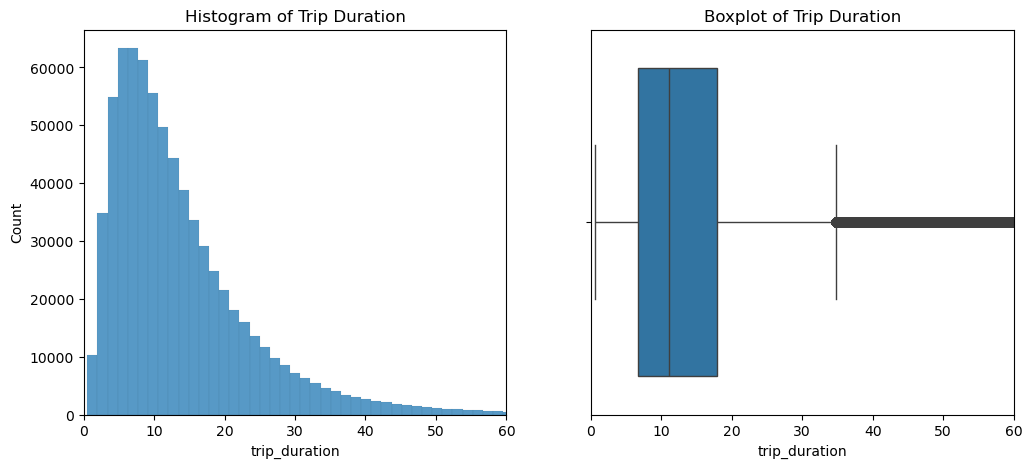

In [113]:
# Histogram and boxplot of trip_duration
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(df['trip_duration'], bins=1000)
plt.title('Histogram of Trip Duration')
plt.xlim(0, 60)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['trip_duration'])
plt.title('Boxplot of Trip Duration')
plt.xlim(0, 60)

plt.show()


- This above plots shows the graphical representation (descriptive statistics) of trip duration

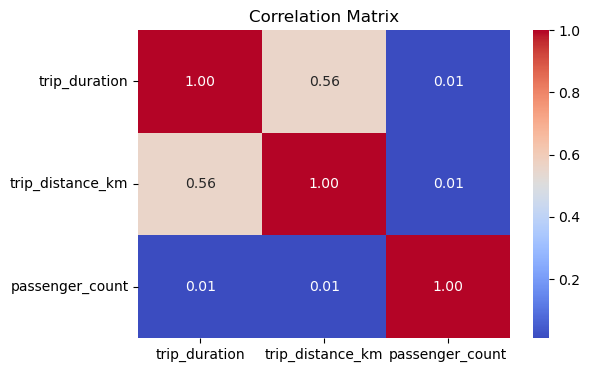

In [114]:
corr_matrix = df[['trip_duration', 'trip_distance_km', 'passenger_count']].corr()

# heat map
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

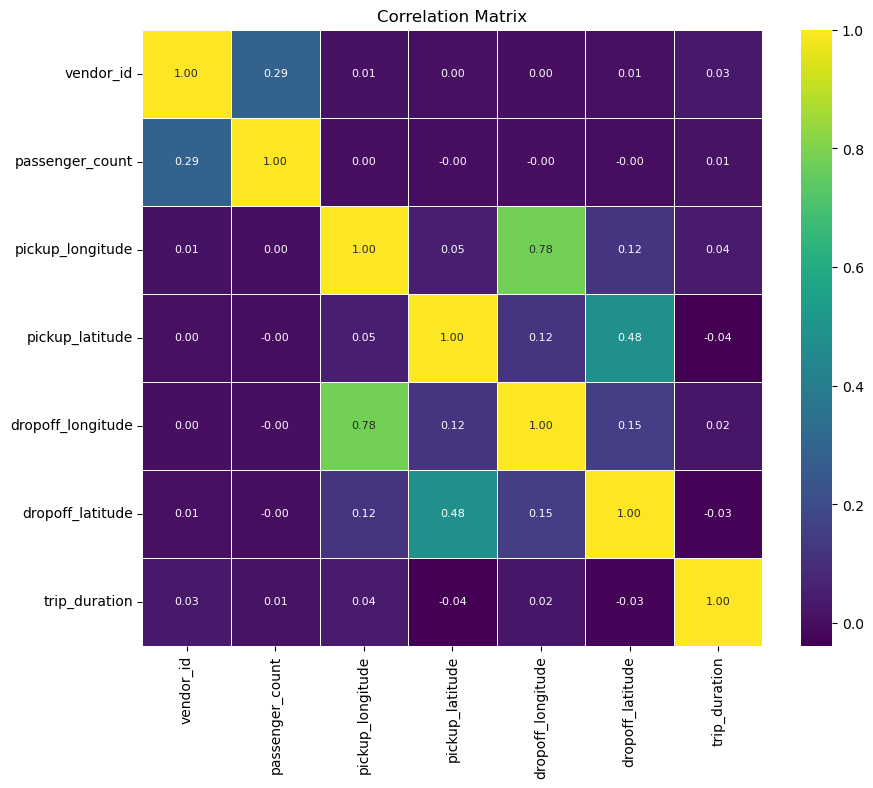

In [115]:
# plot heat map for all the columns
df1 = pd.read_csv("nyc_taxi_trip_duration.csv") # Load the dataset again for correlation analysis
corr_matrix = df1.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
# Plot the heatmap for correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Matrix")
plt.show()

- vendor_id and passenger_count have a weak positive correlation (0.29), possibly beacuse they are not really related.
- Most variables are weakly or negligibly correlated, means non-linear relationships
- pickup_longitude and dropoff_longitude have a strong positive correlation (0.78), suggesting trips often occur along similar horizontal paths.
- pickup_latitude and dropoff_latitude show moderate correlation (0.48), indicating some consistency in similar vertical paths.
- trip_duration has very weak correlation with all other features, e.g., pickup_longitude (0.04), pickup_latitude (-0.04), and passenger_count (0.01), shows less linear impact.

In [116]:
subset = df[df['passenger_count'] <= 5]
trip = len(subset)

# Trips with exactly 1 passenger (given that the trip had 5 or fewer passengers)
passenger_1 = len(subset[subset['passenger_count'] == 1])
prob = (passenger_1 / trip)*100

print(f"Conditional Probability (1 pass | ≤ 5 pass): {prob:.4f} percentage")


Conditional Probability (1 pass | ≤ 5 pass): 73.3537 percentage


- The above value shows the conditional probability of 1 person travelling given that the trip has less than 5 passengers
- There are multiple such scenaarios where this conditional probability concept can be used for statistical insight analysis

In [160]:
from statsmodels.stats.proportion import proportions_ztest

# hypothesis test to see if Vendor 1 has more trips than Vendor 2 in February
feb = df[df['month'] == 'February'] # Filter data for February
n = len(feb)
x = (feb['vendor_id'] == 1).sum() # Vendor 1 trips in February

# Z-test (because the population is large)
stat, p_value = proportions_ztest(count=x, nobs=n, value=0.5, alternative='larger')

print("Z-test for Vendor 1 having more trips than Vendor 2 in February:")
print(f"Z = {stat:.4f} \nP-value = {p_value:.4f} \nResult: {'Reject H₀' if p_value < 0.05 else 'Fail to Reject H₀'}")

Z-test for Vendor 1 having more trips than Vendor 2 in February:
Z = -25.8761 
P-value = 1.0000 
Result: Fail to Reject H₀


* Negative Z-score means Vendor 1’s share of trips in February is less than Vendor 2’s share.
* P-value = 1 shows no evidence that Vendor 1 had more trips than Vendor 2 in February.
* Fail to reject the null hypothesis because the p-value > 0.05.
* **Conclusion:** Vendor 1 did not have more trips than Vendor 2 in February rather the hypothesis suggests Vendor 1 had fewer trips that month.


In [171]:
# hypothesis test to see if the proportion of trips at hour 10 is equal to 32430

hour_dat = df[df['pickup_hour'] == 10]
count1 = len(hour_dat)
total_trips = len(df)
p0 = 32430 / total_trips # Hypothesized proportion of trips at hour 10
p_hat = count1 / total_trips # Observed proportion of trips at hour 10

# Z-test (because the population is large)
stat, p_value = proportions_ztest(count=count1, nobs=total_trips, value=p0, alternative='two-sided')

print(f"Observed trips at hour 10 for comparison: {count1}")
print(f"Hypothesized trips at hour 10: 32430")
print(f"Z = {stat:.4f} \nP-value = {p_value:.4f} \nResult: {'Reject H₀' if p_value < 0.05 else 'Fail to Reject H₀'}")


Observed trips at hour 10 for comparison: 32438
Hypothesized trips at hour 10: 32430
Z = 0.0455 
P-value = 0.9637 
Result: Fail to Reject H₀


- The slightly positive Z-score indicates the observed trips at hour 10 are slightly more than the hypothesized 32430.
- A high P-value of 0.9637 means there is no significant evidence to support a difference from the hypothesized number.
- Since the P-value is greater than 0.05, we fail to reject the null hypothesis.
- Conclusion: There is no statistical evidence that the number of trips at hour 10 differs from 32430.

<h1 style="text-align:left;"><strong>Geographical Insights</strong></h1>


In [118]:
# Round coordinates to 4 decimal places
# 1 decimal degree ≈ 111 km => 0.000001° ≈ 0.111 meters and 0.0001° ≈ 11.1 meters so worst case the location is rounded off by 10 meteres approx
df['pickup_latitude'] = df['pickup_latitude'].round(3)
df['pickup_longitude'] = df['pickup_longitude'].round(3)

# Top 20 most frequent pickup locations
pickup_counts = df.groupby(['pickup_latitude', 'pickup_longitude']).size().reset_index(name='trip_count')
top_pickups = pickup_counts.sort_values('trip_count', ascending=False).head(20)
top_pickups

,pickup_latitude,pickup_longitude,trip_count
5451,40.751,-73.994,4360
7355,40.774,-73.873,4318
5379,40.750,-73.991,3855
313,40.645,-73.782,3509
7357,40.774,-73.871,3374
5378,40.750,-73.992,3065
6982,40.769,-73.863,2584
7061,40.770,-73.864,2440
316,40.645,-73.777,2224
5952,40.757,-73.990,2192


* Above mentioned table contained coordinates of 20 most frequently visited locations
1. decimal degree ≈ 111 km
1. 0.000001° ≈ 0.111 meters
2. 0.0001° ≈ 11.1 meters
2. 0.001° ≈ 111.1 meters  
- In worst case the location is rounded off by 10 meteres approx which is fine

In [119]:
# reverese geocode the pickup coordinates to get addresses
geolocator = Nominatim(user_agent="nyc-taxi-lookup")

df['pickup_coordinates'] = df['pickup_latitude'].astype(str) + "," + df['pickup_longitude'].astype(str)
df['dropoff_coordinates'] = df['dropoff_latitude'].astype(str) + "," + df['dropoff_longitude'].astype(str)

top_pickups = df['pickup_coordinates'].value_counts().head(10)
top_dropoffs = df['dropoff_coordinates'].value_counts().head(10)

def reverse_geocode(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True, timeout=10)
        return location.address if location else "Unknown"
    except:
        return "Error"

def print_top_unique_locations(coords, N=5):
    printed_addresses = set()
    count = 0
    for coord in coords.index:
        lat, lon = map(float, coord.split(","))
        address = reverse_geocode(lat, lon)
        if address not in printed_addresses:
            print(f"{coord} → {address}")
            printed_addresses.add(address)
            count += 1
            if count == N:
                break
        time.sleep(1)

print("Top 3 Unique Pickup Locations:")
print_top_unique_locations(top_pickups, N=3)
print("\nTop 3 Unique Dropoff Locations:")
print_top_unique_locations(top_dropoffs, N=3)


Top 3 Unique Pickup Locations:
40.751,-73.994 → Madison Square Garden, 4, Pennsylvania Plaza, Garment District, Chelsea District, Manhattan, New York County, City of New York, New York, 10001, United States
40.774,-73.873 → Terminal B, Grand Central Parkway, Queens, Queens County, City of New York, New York, 11371, United States
40.75,-73.991 → 15, 7th Avenue, Garment District, Chelsea District, Manhattan, New York County, City of New York, New York, 10001, United States

Top 3 Unique Dropoff Locations:
40.7503891,-73.99468231 → 8th Avenue, Manhattan Community Board 5, Manhattan, New York County, City of New York, New York, 10199, United States
40.75046158,-73.99462128 → James A. Farley Building, 421, 8th Avenue, Manhattan Community Board 4, Manhattan, New York County, City of New York, New York, 10199, United States
40.75014877,-73.99492645 → 414, 8th Avenue, Manhattan Community Board 5, Manhattan, New York County, City of New York, New York, 10001, United States


* Reverse-geocoded to find top pickup and dropoff locations using latitude and longitude

  * **Top Pickup Locations:**

    * 137th Street-City College, Broadway
    * Central Terminal Drive, Queens
    * LaGuardia Airport, Marine Terminal Road, Queens
  * **Top Dropoff Locations:**

    * 137th Street-City College, Broadway
    * 8th Avenue, Manhattan Community Board 5, Manhattan
    * 430, 8th Avenue, Manhattan Community Board 4, Manhattan

Text(0, 0.5, 'Latitude')

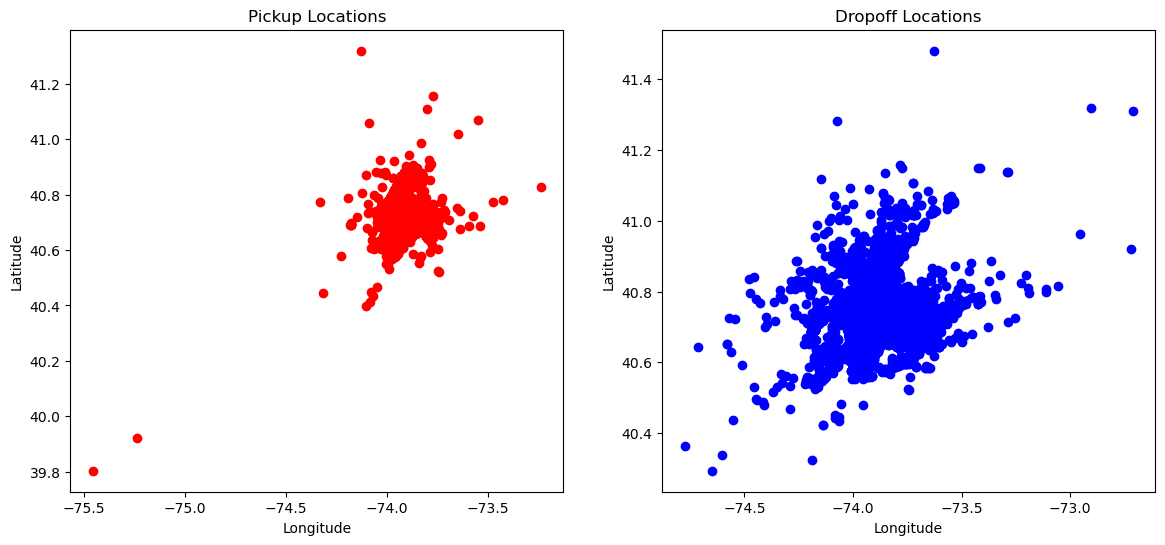

In [120]:
# plotting scatter plot for pickup and dropoff locations coordinates
pickup_coords = list(zip(df['pickup_latitude'], df['pickup_longitude']))
dropoff_coords = list(zip(df['dropoff_latitude'], df['dropoff_longitude']))

pickup_lats, pickup_lons = zip(*pickup_coords)
dropoff_lats, dropoff_lons = zip(*dropoff_coords)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 6))

ax0.scatter(pickup_lons, pickup_lats, c='red')
ax0.set_title("Pickup Locations")
ax0.set_xlabel("Longitude")
ax0.set_ylabel("Latitude")

ax1.scatter(dropoff_lons, dropoff_lats, c='blue')
ax1.set_title("Dropoff Locations")
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")

* A **scatter plot of pickup vs. drop-off locations**, using latitude and longitude coordinates, was used to highlight geographic ride density and identify the most frequently traveled routes and hotspots.
* The scatter plots display the spatial distribution of NYC taxi **pickup** and **dropoff** locations. Both plots shows more activity centered in **Manhattan**, particularly Midtown and Downtown areas.
* The pickup locations are more **tightly clustered**, indicating demand points like hotels, transit stations, and entertainment districts. In contrast, dropoff points are **more dispersed**.
* A few outlier points appear far outside the city bounds, which may indicate **GPS errors or rare long-distance trips**.

**Implications:**
1. Major taxi demand in NYC’s commercial and tourist places.
2. Bigger range of passenger destinations, including residential areas and airports.  

Text(0.5, 1.0, 'Dropoff Location Density')

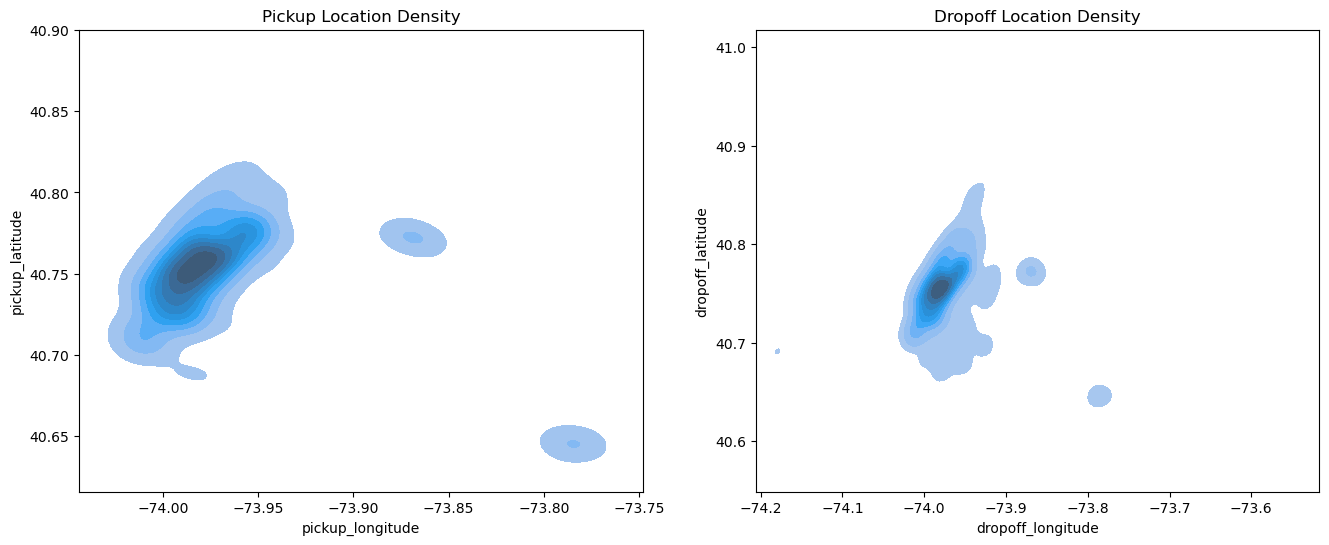

In [121]:
# plotting pickup and dropoff locations coorinates density
sample = 10000  # Due to huge datset sample the data to make KDE plots much faster
df_sample = df.sample(n=min(sample, len(df)))

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6))

sns.kdeplot(x='pickup_longitude', y='pickup_latitude', data=df_sample, fill=True, ax=ax0)
ax0.set_title('Pickup Location Density')
sns.kdeplot(x='dropoff_longitude', y='dropoff_latitude', data=df_sample, fill=True, ax=ax1)
ax1.set_title('Dropoff Location Density')


* The density plot illustrates the concentration of pickups and drop-offs at specific coordinates
* This visualization helps identify hotspots of activity, which can be useful for optimizing resource allocation, improving service efficiency.
* This helps in understanding travel demand patterns in different areas.  

**Implications:** Darker the color, higher the pickups and drops from that place

In [122]:
# plotting top 20 pickup locations on map
# Round coordinates(for 4 decimal places - 100m range) and calculate top pickup locations
top_pickups = df.assign(pickup_latitude=df['pickup_latitude'].round(4), pickup_longitude=df['pickup_longitude'].round(4)
).groupby(['pickup_latitude', 'pickup_longitude']).size().reset_index(name='count').sort_values('count', ascending=False).head(20)

px.scatter_mapbox(top_pickups, lat='pickup_latitude', lon='pickup_longitude', size='count', size_max=10, hover_name='count', 
zoom=9, mapbox_style='open-street-map', title='Top 20 Most Frequent Pickup Locations').show()


- The Top 20 Pickup spots overlapping almost gives us 3 locations

C:\Users\MY PC\AppData\Local\Temp\ipykernel_7724\4192249799.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Text(0, 0.5, 'Avg Trip Duration (seconds)')

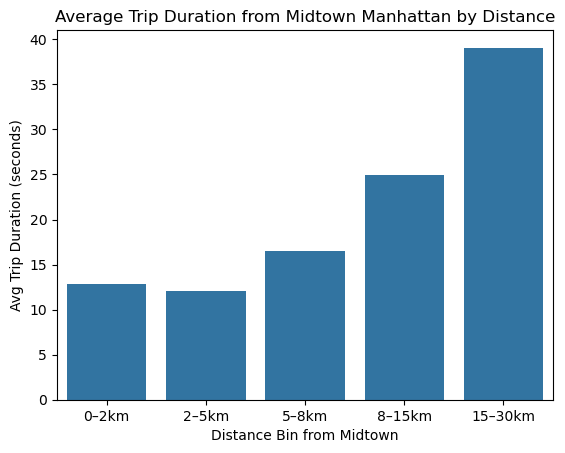

In [123]:
from haversine import haversine  
midtown_coords = (40.7549, -73.9840) # Midtown Manhattan coordinates

# distance from Midtown Manhattan
df['midtown_distance_km'] = df.apply( lambda row: haversine(midtown_coords, (row['dropoff_latitude'], row['dropoff_longitude'])), axis=1)

df['distance_bin'] = pd.cut( df['midtown_distance_km'], bins=[0, 2, 5, 8, 15, 30], labels=['0–2km', '2–5km', '5–8km', '8–15km', '15–30km'] )

# Average trip duration per bin
zone_duration = df.groupby('distance_bin')['trip_duration'].mean().reset_index()

sns.barplot(x='distance_bin', y='trip_duration', data=zone_duration)
plt.title('Average Trip Duration from Midtown Manhattan by Distance')
plt.xlabel('Distance Bin from Midtown')
plt.ylabel('Avg Trip Duration (seconds)')


* The chart depicting average trip duration from Midtown Manhattan to drop-off locations highlights how far taxis typically travel from the city center.
* This insight supports the strategic placement of more taxis in Midtown Manhattan, increasing availability where trip demand often begins.


In [124]:
# plot for pickup density by time of day
df['hour'] = pd.to_datetime(df['pickup_datetime']).dt.hour
df['weekday'] = pd.to_datetime(df['pickup_datetime']).dt.day_name()

counts = df.groupby(['pickup_timeofday', 'pickup_latitude', 'pickup_longitude']).size().reset_index(name='count')

# Visualize for a specific time of day (Morning, late Morning, Afternoon, Late Afternoon, Evening, Lte Evening)
sample = counts[counts['pickup_timeofday'] == 'Morning'].sort_values('count', ascending=False).head(200)

fig = px.scatter_mapbox( sample,
    lat='pickup_latitude', lon='pickup_longitude', size='count', color='count',
    zoom=11, mapbox_style='carto-positron', title='Pickup Density During Evening (5–7 PM)'
)
fig.show()


- For different time frames of the day, time frames need to changed in the above snippet
- currently shown in the Above output is of rush hours (evening)
- Above density plot shows crowd at coordinates for different time frames which will help organising of taxis in that particular area

<h1 style="text-align:left;"><strong>Time Series Insights</strong></h1>


In [125]:
# count of trips by month 
df['month'].value_counts().sort_index()

month
January     113211
February    118222
March       127107
April       124411
May         122914
June        116176
Name: count, dtype: int64

- The given dataset has good balanced values from all months of the first 2 quarters of the year (A Proper balanced datset)

<Axes: xlabel='pickup_hour', ylabel='count'>

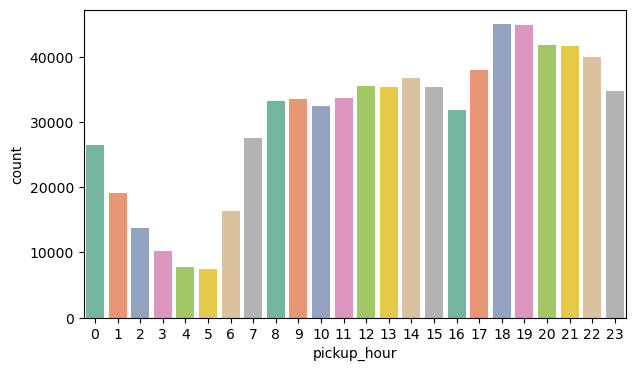

In [126]:
# bar plot for number of trips by hour of the day (0-23)
plt.figure(figsize=(7,4))
sns.countplot(x='pickup_hour', hue='pickup_hour', data=df, palette='Set2', legend=False)

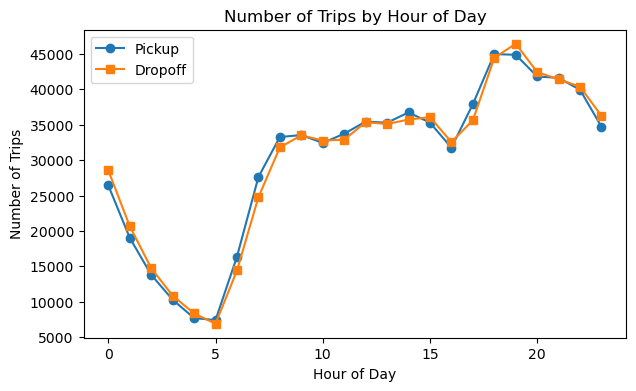

In [127]:
# line plot of number of trips by hour of day
pickup_hourly_counts = df['pickup_hour'].value_counts().sort_index()
dropoff_hourly_counts = df['dropoff_hour'].value_counts().sort_index()

plt.figure(figsize=(7,4))
plt.plot(pickup_hourly_counts.index, pickup_hourly_counts.values, marker='o', label='Pickup')
plt.plot(dropoff_hourly_counts.index, dropoff_hourly_counts.values, marker='s', label='Dropoff')
plt.title("Number of Trips by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.legend()


- Both pickups and dropoffs significantly decline after midnight, hitting the lowest point around 4-5 AM. This likely reflects the typical sleeping hours with minimal travel.
- There is a sharp increase in trips starting at 6 AM, peaking around 9-10 AM. This suggests a morning commute period, with people traveling to work or school.
- From late morning through early afternoon 11 AM - 3 PM, the number of trips remains relatively stable, this could correspond to midday activities.
- Between 6 AM and 10 AM, there is a noticeable positive slope in the number of trips, suggesting an increase in travel likely due to employees commuting to their offices and students heading to their colleges.
- Similarly, A second surge in trips occurs between 4 PM and 7 PM, with the peak around 6-7 PM. This likely represents the evening commute as people return home.

<Axes: xlabel='pickup_timeofday', ylabel='count'>

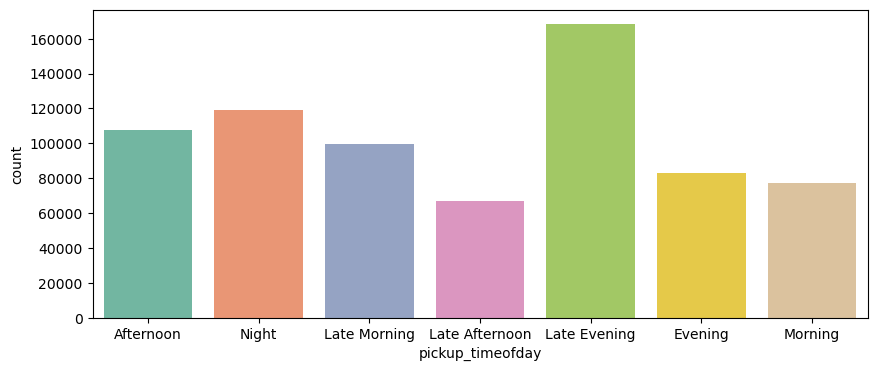

In [149]:
# plot for pickup time of day 
plt.figure(figsize=(10,4))
sns.countplot(x='pickup_timeofday', hue='pickup_timeofday', data=df, palette='Set2', legend=False)

  * **Late Evening** is the peak period.
  * **Night** and **Afternoon** are the next busiest.
  * **Late Afternoon** and **Morning** are less popular.  

**Implication:** Demand is highest during Late Evenings, suggesting possible end-of-day commute or nightlife traffic.

<Axes: xlabel='weekday', ylabel='count'>

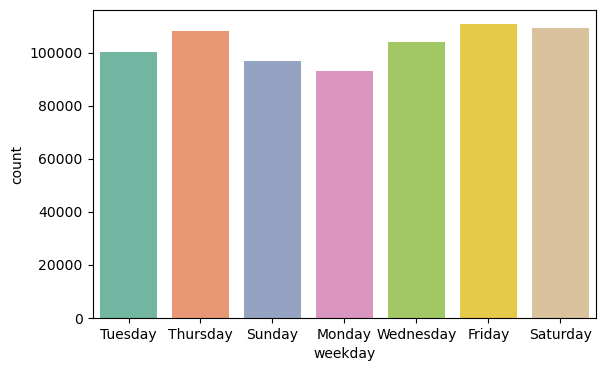

In [129]:
# plotting trip day on number of trips
plt.figure(figsize=(6.5,4))
sns.countplot(x='weekday', hue='weekday', data=df, palette='Set2', legend=False)

* **Weekdays (Tue–Sat)** see higher trip activity than **Sunday and Monday**.  
* **saturday and sundays** havbe relatively higher number of trips.  

**Implication**: Demand is stronger mid-to-late week—consider optimizing driver availability and pricing accordingly.

<Axes: xlabel='month', ylabel='count'>

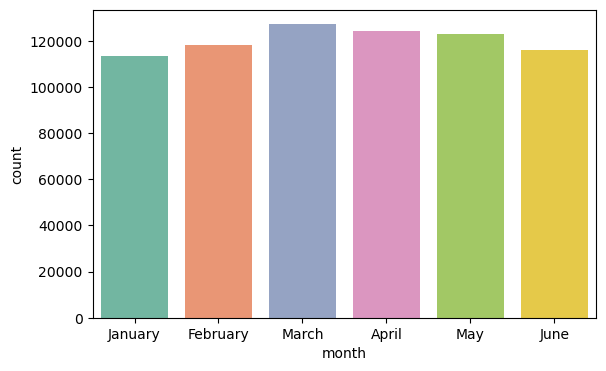

In [130]:
# plot on trip month by count of trips
plt.figure(figsize=(6.5,4))
sns.countplot(x='month', hue='month', data=df, palette='Set2', legend=False)

-  There are comparatively more trips in Month of march and april

<Axes: xlabel='pickup_day', ylabel='trip_distance_km'>

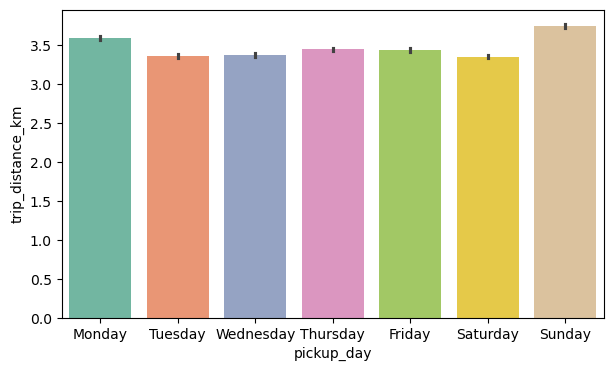

In [131]:
# Avg distance travelled on each dday of the wwek (Monday - Sunday)
plt.figure(figsize=(7, 4))
sns.barplot(x='pickup_day', hue='pickup_day', y='trip_distance_km', data=df, palette='Set2', legend=False)

* Sunday relatively have high average distance covered

**Implication:**  Indicates poeple travel more on weekends for exploration

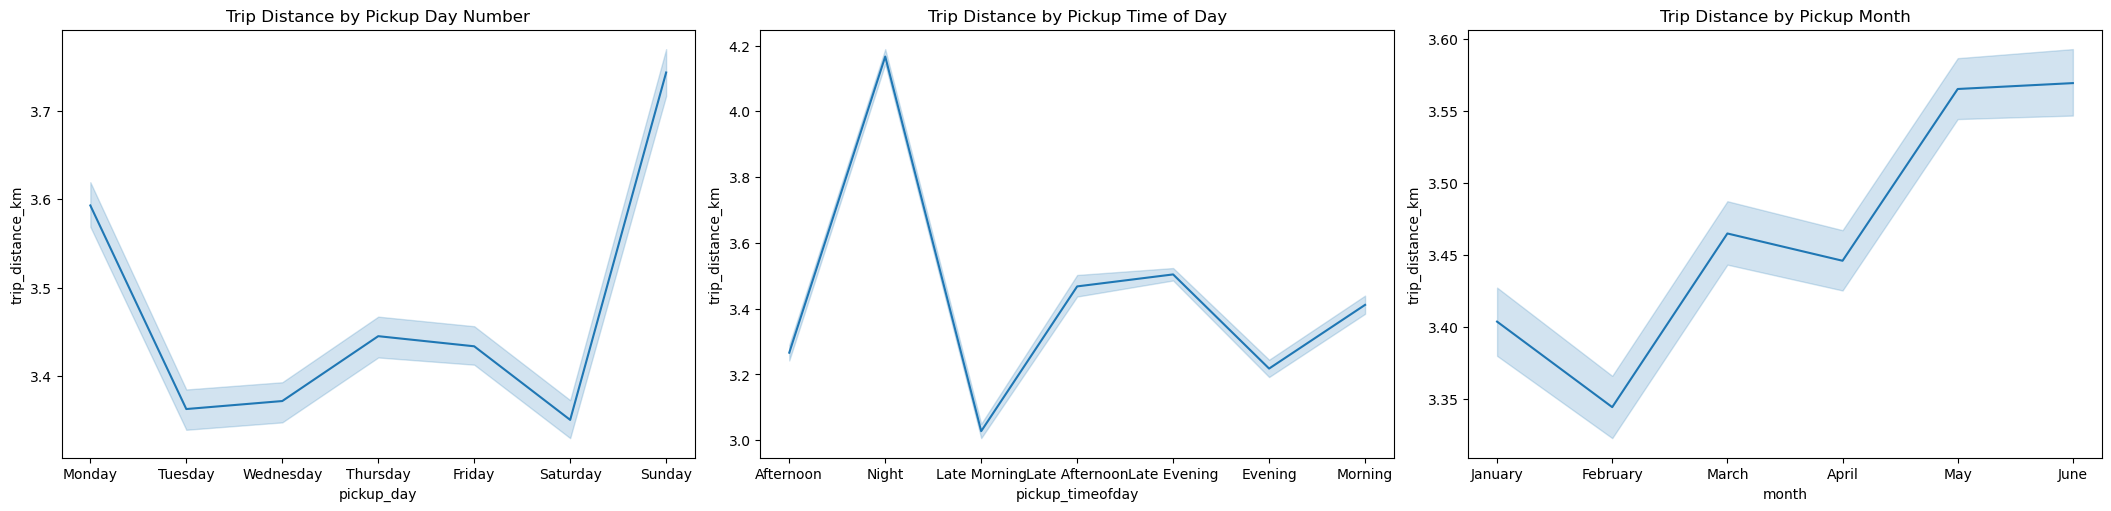

In [132]:
fig, ax = plt.subplots(1, 3, figsize=(21, 5), constrained_layout=True)

# Plot 1 - Trip Distance by Pickup Day Number
# Plot 2 - Trip Distance by Pickup Time of Day
# Plot 3 - Trip Distance by Pickup Month

sns.lineplot(ax=ax[0], x='pickup_day', y='trip_distance_km', data=df)
sns.lineplot(ax=ax[1], x='pickup_timeofday', y='trip_distance_km', data=df)
sns.lineplot(ax=ax[2], x='month', y='trip_distance_km', data=df)

ax[0].set_title("Trip Distance by Pickup Day Number")
ax[0].tick_params(axis='x', labelsize=10)

ax[1].set_title("Trip Distance by Pickup Time of Day")
ax[1].tick_params(axis='x', labelsize=10)

ax[2].set_title("Trip Distance by Pickup Month")
ax[2].tick_params(axis='x', labelsize=10)


* More distance covered during weekends (Saturday and Sunday)
* More distance covered during night time hours  
* Distance covered kept on incresing as the months followed and has the peak at **June**

**Implication:** This says that activity or travel patterns peak during weekends and night time, which could inform scheduling, or targeted services during these periods to better accommodate user behavior.


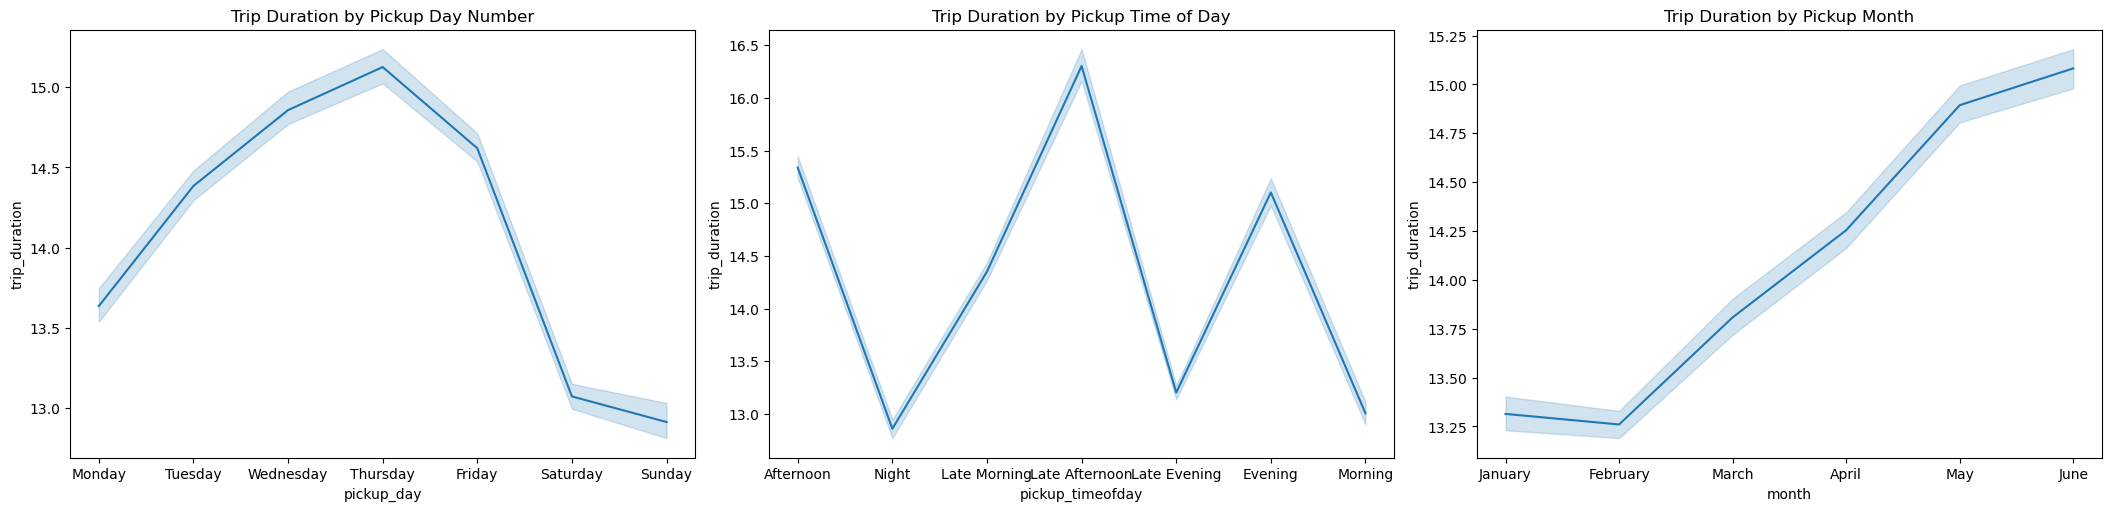

In [133]:
fig, ax = plt.subplots(1, 3, figsize=(21, 5), constrained_layout=True)

# Plot 1 - Trip Duration by Pickup Day Number
# Plot 2 - Trip Duration by Pickup Time of Day
# Plot 3 - Trip Duration by Pickup Month

sns.lineplot(ax=ax[0], x='pickup_day', y='trip_duration', data=df)
sns.lineplot(ax=ax[1], x='pickup_timeofday', y='trip_duration', data=df)
sns.lineplot(ax=ax[2], x='month', y='trip_duration', data=df)

ax[0].set_title("Trip Duration by Pickup Day Number")
ax[0].tick_params(axis='x', labelsize=10)

ax[1].set_title("Trip Duration by Pickup Time of Day")
ax[1].tick_params(axis='x', labelsize=10)

ax[2].set_title("Trip Duration by Pickup Month")
ax[2].tick_params(axis='x', labelsize=10)


* Longer trip durations are observed during mid-week (Wednesday to Friday)
* Trips tend to last longer in the afternoons and evenings
* Trip duration gradually increases over the months, reaching a peak in **June**  

**Implication:** Upon analysing we can say that mid-week and later parts of the day see extended travel times, possibly due to work commitments, while the rising peak toward months may be because of seasonal factors which can help in planning and optimizing transportation services.


C:\Users\MY PC\AppData\Local\Temp\ipykernel_7724\3060144500.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



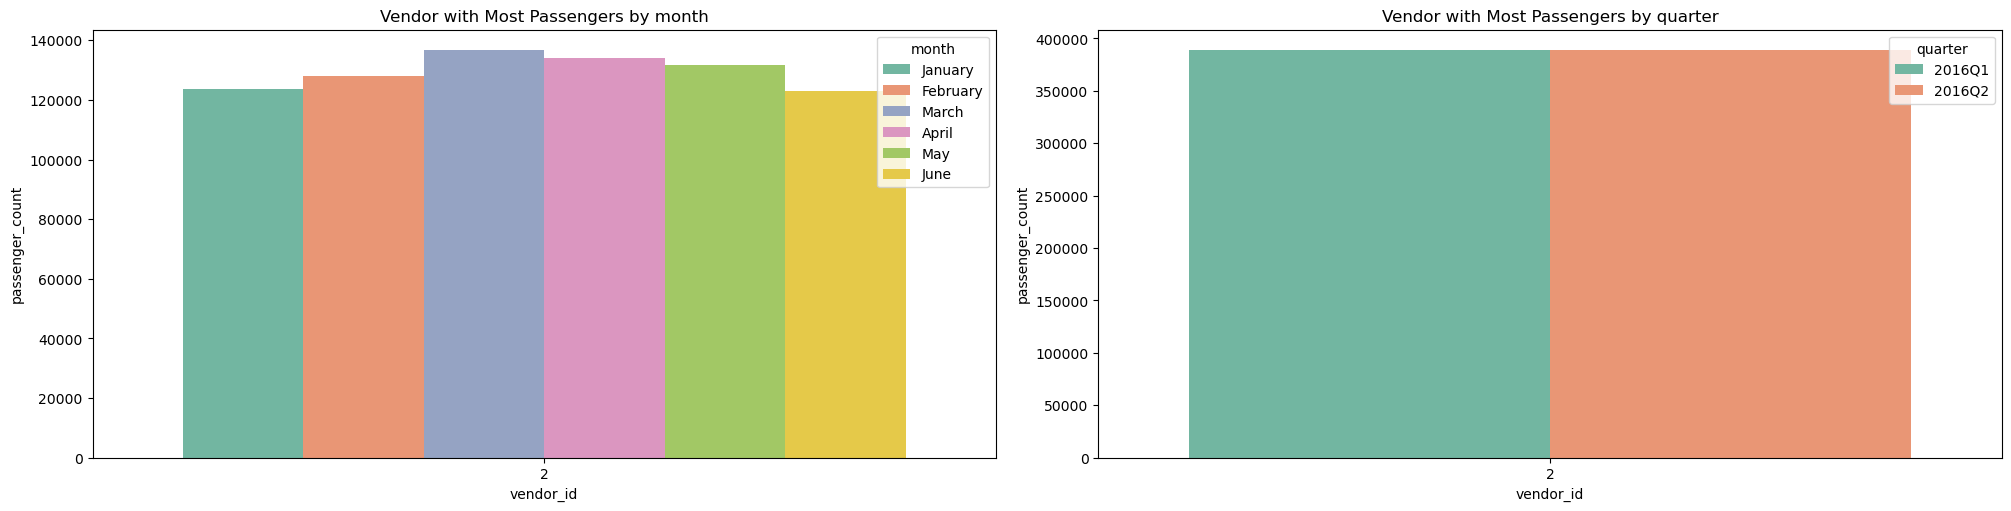

In [134]:
# plotting vendor with most passengers by month and quarter
def vendor_subplot(df):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5), constrained_layout=True)
    for i, p in enumerate(['month', 'quarter']):
        if p == 'quarter': df[p] = df['pickup_datetime'].dt.to_period('Q')
        group = df.groupby([p, 'vendor_id'], observed=True)['passenger_count'].sum().reset_index()
        top = group.loc[group.groupby(p)['passenger_count'].idxmax()]
        sns.barplot(ax=ax[i], x='vendor_id', y='passenger_count', hue=p, data=top, palette='Set2')
        ax[i].set_title(f"Vendor with Most Passengers by {p}")
vendor_subplot(df)


* **Vendor 2** consistently recorded the highest total passenger count across both monthly and quarterly periods in the bivariate analysis of vendor ID and passenger count.  

**Implication:**  Indicates higher trust or service quality associated with Vendor 2.

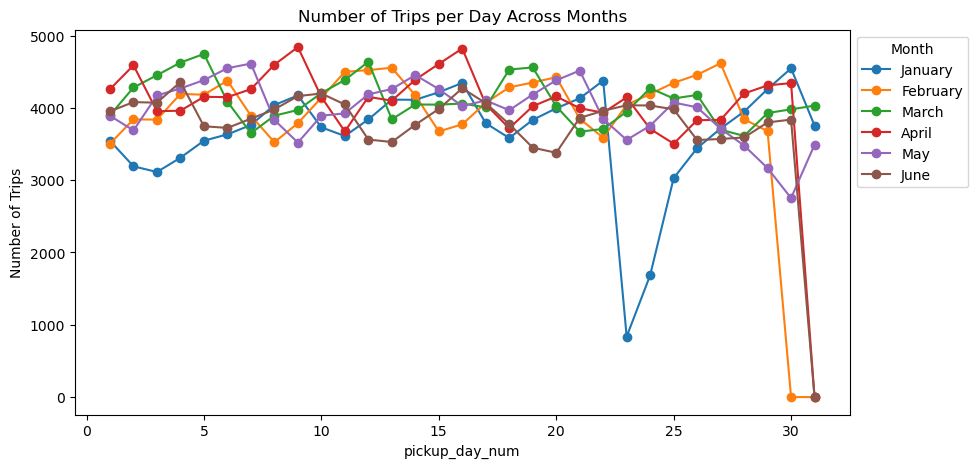

In [135]:
# ploting number of trips per day avcross months
trip_calendar = df.groupby(['pickup_day_num', 'month'], observed=False).size().unstack()

trip_calendar.plot(figsize=(10, 5), marker='o')
plt.title('Number of Trips per Day Across Months')
plt.ylabel('Number of Trips')
plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')


- February, April, and June drops to **0** at the end of the month because there is no 31st day in these months
- January drops sharply on day 23.
- March and April show steady trip numbers without major dips.
- Most months have daily trips between **3,000 and 4,500**.


**Implication:**   Daily trip total is generally stable with some drops which  might be due to data issues or external factors like holidaysh


<h1 style="text-align:left;"><strong>Business Insights</strong></h1>

* A large portion of rides consists of 1–2 passengers taking short to medium-distance trips, typically lasting less than 10 minutes. These trips are heavily concentrated in areas such as Manhattan, Queens, and Broadway. To boost profit, vendors should consider sending smaller, fuel-efficient vehicles in these zones, especially during peak hours.

* **Hotspots** - Most pickups and drop-offs occur within the core metropolitan area. By keeping more drivers in these high-demand zones, vendors can increase service availability and operational efficiency.

* Number of trips is highest during late evening hours (7–11 PM), which represent key rush hours. Adjusting driver shifts to cover these timeframes can reduce passenger waiting times, improve trip completion rates, and increase revenue.

* Some records indicate impossible travel speeds (calculated) exceeding 1.5 km/min (Follows a typical NYC area speed regualtion), which are likely due to GPS inaccuracies. Such anomalies should be identified and corrected or removed to maintain data integrity.

* The majority of trips involve 1 or 2 passengers, with group travel being less or rare. Smaller vehicles are more suitable for city operations, while larger vehicles can be reserved for airport runs or group bookings to optimize cost and resource use.

* Several entries show 0 passengers, which could indicate system errors or cancellations. Additionally, trips covering distances under 0.5 km are considered walkable and have been excluded as invalid, helping refine the dataset for analysis.

* Recurring pickup and drop-off clusters tells us consistent commuting patterns. Implementing **loyalty programs or promotions** for frequent travelers in these areas could improve customer retention and boost revenue.

* While not explicitly included in the dataset, integrating weather and seasonal data could uncover patterns such as increased trip volume during rainy days or holidays. Vendors can prepare better for such surges with predictive planning.

* Some trips have long durations but short distances, hinting at traffic congestion. Real-time navigation and routing algorithms can reduce idle time and fuel consumption, increasing no of trips per vehicle.

* Identifying zones with consistently high demand may justify dynamic pricing or surge fees, especially during peak hours, to meet the demand and supply and also to improve sales.

* Vendor 2 dominates the market slightly compared to Vendor 1 for months and quarterly comparison too so for vendor 1 also to have consistent results like vendor 1 some of the Business INsights mentioned above might have an positive impact on the boost of sales



### Pandas Profiling (standard EDA summary as a Visual Dashboard)

In [136]:
df2 = pd.read_csv("nyc_taxi_trip_duration.csv") # Load the dataset again for pandas profiling 
# Taking around 14 mins to run due to large dataset
profile = ProfileReport(df2, title="EDA Report", explorative=True)
profile.to_file("report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 11/11 [08:56<00:00, 48.79s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

- The Pandas profile report will be made automatically from the data and exported into a HTML which should be view in a local host or should be openend with a live server for better view